In [198]:
from sympy import *
sympy.init_printing()

In [199]:
m, x, alpha, beta, y, m0 = symbols('m x alpha beta y m0', nonnegative=True)

In [200]:
V = Function("V")

In [201]:
query_expression = x * V(x*m) + (1 - x) * V((1 - x) * m)
query_expression

In [262]:
def linear(state):
    return (1 - state / 4) / (1 - beta)

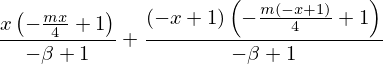

In [203]:
query_expression_w_linear = query_expression.subs(V(x*m), linear(x*m)).subs(V((1-x)*m), linear((1-x) * m))
query_expression_w_linear

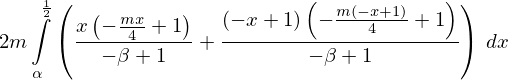

In [204]:
query_integral = 2*m*Integral(query_expression_w_linear, (x, alpha, Integer(1)/2))
query_integral

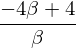

In [206]:
m0 = 4 * (1 - beta) / beta
m0

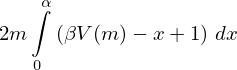

In [207]:
guess_unknown_integral = 2*m*Integral((1 - x) + beta * V(m), (x, 0, alpha))
guess_unknown_integral

In [208]:
guess_known_integral = (1 - m) * (1 + beta * V(m))
guess_known_integral

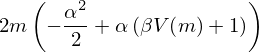

In [209]:
guess_unknown_value = guess_unknown_integral.doit()
guess_unknown_value

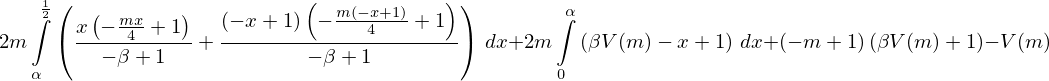

In [247]:
should_be_zero = query_integral + guess_unknown_integral + guess_known_integral - V(m)
should_be_zero

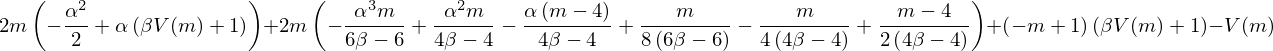

In [248]:
should_be_zero_evald = should_be_zero.doit()
should_be_zero_evald

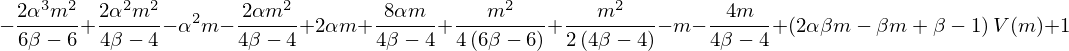

In [249]:
should_be_zero_evald.expand().collect(V(m))

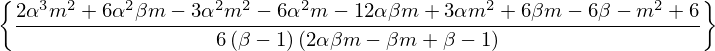

In [251]:
solutions = solveset(should_be_zero_evald, V(m))
solutions

In [253]:
solution = list(solutions)[0]

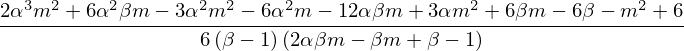

In [255]:
solution

In [ ]:
# This is what I get to work with. It seems almost impossible that 

In [257]:
# This is pretty disgusting. 

In [258]:
diff_soln = diff(solution, alpha)

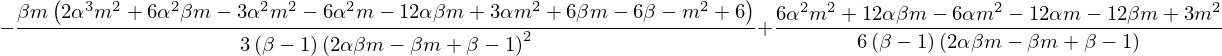

In [259]:
diff_soln

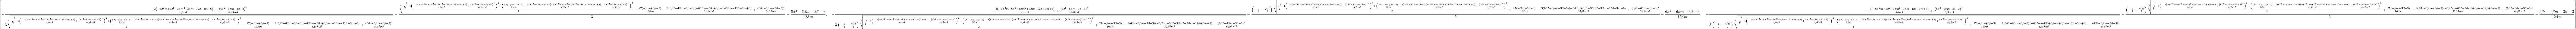

In [260]:
# This is pretty ridiculous.
# This should be the minimizing/maximizing alpha
# I'm getting a little bit confused why t
solve(diff_soln, alpha)

In [ ]:
# I have no idea what to do next. 

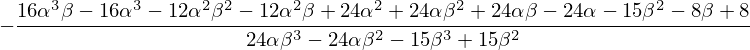

In [261]:
simplified_solution.limit(m, m0)

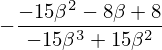

In [263]:
# This should reduce to correct if alpha = 0
simplified_solution.limit(m, m0).subs(alpha, 0)
# But it does not... weird. I think I'm off by a factor of 2 somewhere in the setup.
# Not sure if it's worth checking this--I trust my other notebook more.

In [ ]:
# Whoa, alright. This is clearly wrong. It should be the value function at m_0, which we know to be different
# It makes sense that the alpha should drop out, though, because in the limit, you're only querying in the center.
# Not sure what else I can do here.

In [ ]:
# Maybe try to do the hand calculation in the limit again?
# Or do a super high res simulation?